# Problem Statement

# Step1:Import the necessary libraries

In [7]:
import numpy as np         #maths inputs
import pandas as pd            #reading the data
import matplotlib.pyplot as plt     #Visualization
import seaborn as sns               #Visuals

In [8]:
#Read the data
data=pd.read_csv("Fish.csv")
data

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

# Step2: Exploring Data Analysis (EDA)

In [10]:
data.shape #Gives us the shape

(159, 7)

In [11]:
data.head() #gives the first 5  records

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [12]:
data.tail( ) #gives the last 5

Species  Weight  Length1  Length2  Length3  Height   Width
154   Smelt    12.2     11.5     12.2     13.4  2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5  2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8  2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2  2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2  2.9322  1.8792

In [13]:
data.columns #Gives us the columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [14]:
data.dtypes #gives the datatype

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [15]:
data.Species.nunique()  #Find out the unique letters in the object

7

In [16]:
sns.countplot(data.Species)

C:\Users\metti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

In [17]:
data.info() #gives us the info along with the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [18]:
data.describe().T #Everything about data

count        mean         std     min        25%       50%       75%  \
Weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
Length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
Length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
Length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
Height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
Width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
Weight   1650.000  
Length1    59.000  
Length2    63.400  
Length3    68.000  
Height     18.957  
Width       8.142

In [ ]:
#Here we observe that the min value in Weight is 0..which is of no use..so we drop that 

data.loc[(data['Weight']==0)]

In [ ]:
data.drop([40,],axis=0,inplace=True)

In [19]:
data.shape

(159, 7)

In [20]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Weight        AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length1    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Length2    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Length3       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Height     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Width      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

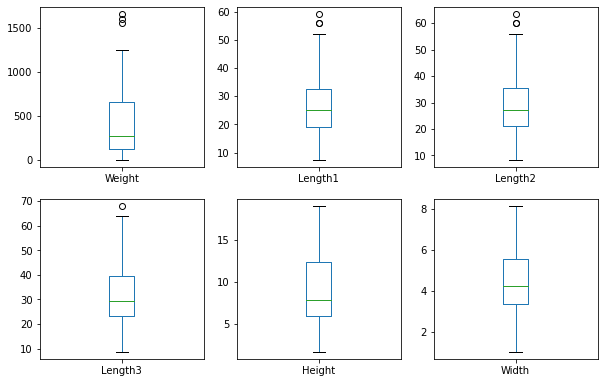

In [21]:
#boxplot for finding outliers
data.plot(kind='box',subplots=True,figsize=(10,10),layout=(3,3))

In [22]:
# Removing the outliers

Q1=np.quantile(data['Weight'],0.25)
Q3=np.quantile(data['Weight'],0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

print('Original shape',data.shape)

data=data.loc[(data['Weight']>lower) & (data['Weight']<upper),]

print('New shape',data.shape)

Original shape (159, 7)
New shape (156, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

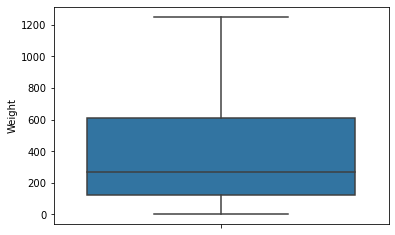

In [23]:
#Rechecking
sns.boxplot(y=data['Weight'])
plt.show

In [31]:
data.plot(kind="box",subplots=True,layout=(3,3),figsize=(10,10))
plt.show()

<AxesSubplot:>

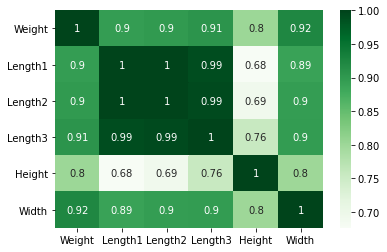

In [32]:
#Find the correlation among the variables
sns.heatmap(data.corr(),annot=True,cmap='Greens')

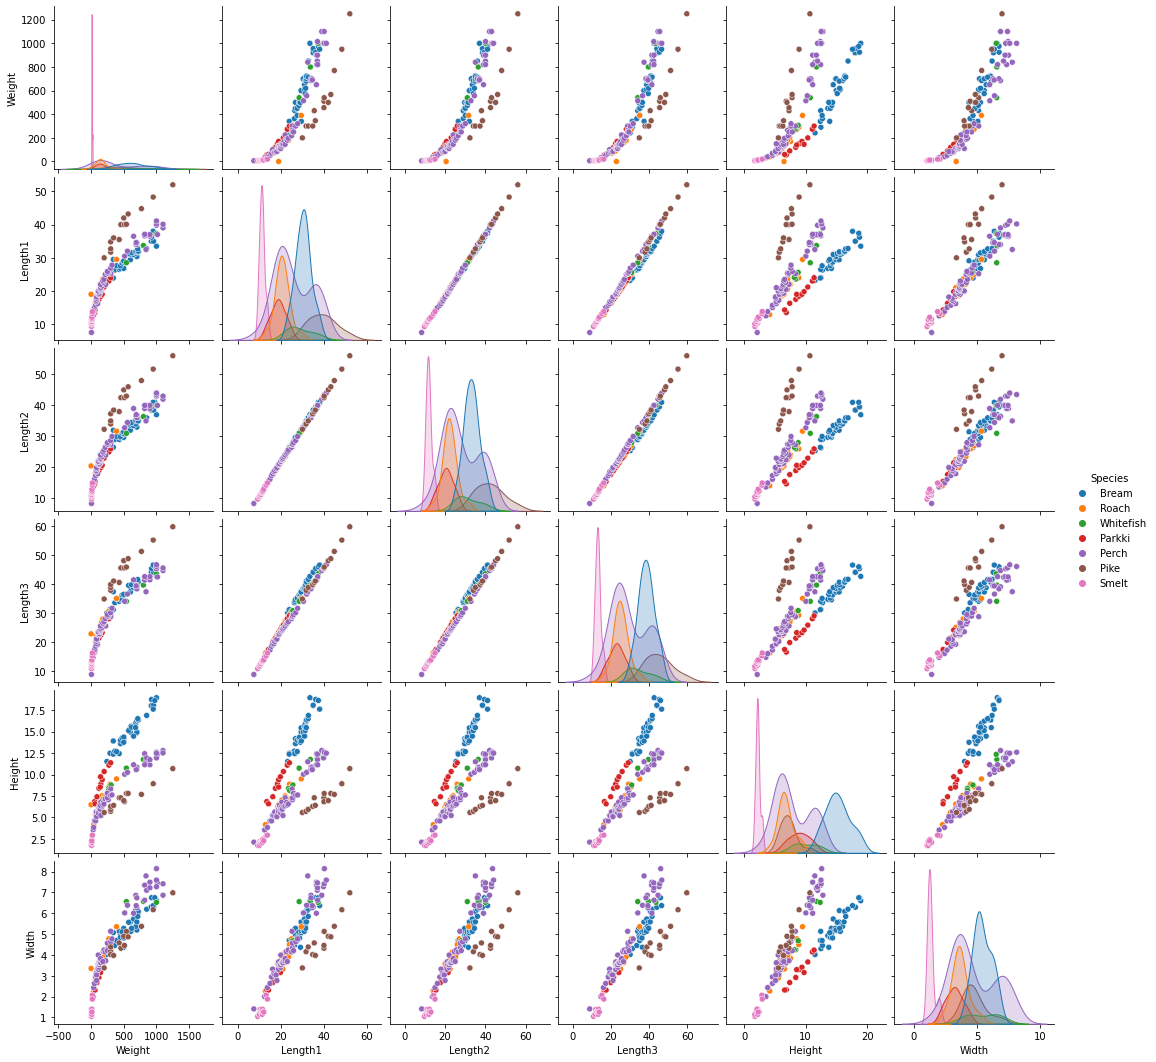

In [33]:
sns.pairplot(data,hue='Species')
plt.show()

# Step-III Data PreProcessing

In [34]:
#DataType conversion
data.dtypes


Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [35]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [36]:
#conversion of dtype
data['Species']=data['Species'].astype('category')

<ipython-input-36-5039ed9e3d6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species']=data['Species'].astype('category')


In [37]:
#checking datatypes again
data.dtypes

Species    category
Weight      float64
Length1     float64
Length2     float64
Length3     float64
Height      float64
Width       float64
dtype: object

In [24]:
# checking for the missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
#We completed the cleaning process

# Creating dummification for the column species

In [25]:
data_dummy=pd.get_dummies(data,drop_first=True)
# data.tail()

In [26]:
X=data_dummy.drop('Weight',axis=1)
y=data_dummy['Weight']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11234)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 11)
(32, 11)
(124,)
(32,)


In [29]:
import statsmodels.api as sm
X_reg=sm.add_constant(X_train)
X_test_reg=sm.add_constant(X_test)

In [30]:
model=sm.OLS(y_train,X_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           1.26e-66
Time:                        03:49:45   Log-Likelihood:                -704.87
No. Observations:                 124   AIC:                             1434.
Df Residuals:                     112   BIC:                             1468.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -764.1553    115.58

In [39]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [40]:
#visualizing the Assumption plots of the model
def get_plots(y_train,preditctions):
    f = plt.figure(figsize=(20,10))
    ax = f.add_subplot(221)
    sns.scatterplot(y_train,preditctions,ax=ax,color='r')
    ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
    
    std_residuals = stats.zscore(y_train-preditctions)
    ax = f.add_subplot(222)
    sns.scatterplot(preditctions,std_residuals,ax=ax,color='g')
    ax.set_title('Check for Linearity:\n Predicted value Vs Std.Residuals')


# Check for Residual normality & mean
    ax = f.add_subplot(223)
    sns.distplot((y_train - preditctions),ax=ax,color='b')
    ax.axvline((y_train - preditctions).mean(),color='k',linestyle='--')
    ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [41]:
get_plots(y_train,model.fittedvalues)

In [42]:
# Residuals - QQ Plot
# ax = f.add_subplot(224)
sm.qqplot(model.resid, line='s')

plt.show()

In [43]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test'])

def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = metrics.mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = metrics.mean_absolute_percentage_error(test_act,test_pred)
    dataframe = dataframe.append(pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [44]:
scores = get_metrics(y_train,model.predict(X_reg),y_test,model.predict(X_test_reg),"simple_reg",scores)
scores

Model  MAE_Train    MSE_Train  RMSE_Train    MAPE_Train   MAE_Test  \
0  simple_reg  52.251297  5069.855816    71.20292  4.112301e+15  69.017871   

      MSE_Test  RMSE_Test  MAPE_Test  
0  8692.051139   93.23117   0.359163